#                      UFC Events Data : EDA and Data Storytelling Project                                                      

#### Link to Dataset : https://www.kaggle.com/datasets/asaniczka/ufc-fighters-statistics

About the dataset: 

- Fighter 1, Fighter 2 : Names of the fighters

- KD : Knockdowns

- STR : Significant Strikes Landed 

- SUB : Submission attempts

- TD : Takedowns

- Method : Method of victory

- Round : Round of victory/finish

- Time : Duration of fight in minutes

- Winner : Name of winner

- Event Name, Date, Location : details of event

________________________________________________________________________________________________________________________________

---

 - Importing all required libraries :

In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import calendar

## Loading the dataset (adjust path and file name accordingly):

In [3]:
ufc_events_data=pd.read_csv(r"C:\Users\Asus\Desktop\CODE\AllProjects\UFC- Events dataset project\UFC Events Data (1993-2023)\ufc-events-data.csv")

data = ufc_events_data.copy()

### Peeking at the the dataset :

In [4]:
data.head(8)

,Location,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Event Name,Date,Winner
0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,1:04,UFC Fight Night,2-Dec-23,Arman Tsarukyan
1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,2:49,UFC Fight Night,2-Dec-23,Jalin Turner
2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Deiveson Figueiredo
3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,1:43,UFC Fight Night,2-Dec-23,Sean Brady
4,"Austin, Texas, USA",Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Joaquim Silva
5,"Austin, Texas, USA",Dustin Stoltzfus,Punahele Soriano,1.0,0.0,64.0,31.0,4.0,0.0,1.0,0.0,Middleweight,SUB Rear Naked Choke,2.0,4:10,UFC Fight Night,2-Dec-23,Dustin Stoltzfus
6,"Austin, Texas, USA",Miesha Tate,Julia Avila,0.0,0.0,32.0,3.0,4.0,0.0,1.0,0.0,Women's Bantamweight,SUB Rear Naked Choke,3.0,1:15,UFC Fight Night,2-Dec-23,Miesha Tate
7,"Austin, Texas, USA",Cody Brundage,Zach Reese,0.0,0.0,9.0,4.0,1.0,0.0,0.0,1.0,Middleweight,KO/TKO Slam,1.0,1:49,UFC Fight Night,2-Dec-23,Cody Brundage


- Checking data types :

In [5]:
data.dtypes

Location          object
Fighter 1         object
Fighter 2         object
Fighter_1_KD     float64
Fighter_2_KD     float64
Fighter_1_STR    float64
Fighter_2_STR    float64
Fighter_1_TD     float64
Fighter_2_TD     float64
Fighter_1_SUB    float64
Fighter_2_SUB    float64
Weight_Class      object
Method            object
Round            float64
Time              object
Event Name        object
Date              object
Winner            object
dtype: object

- Checking for null values :

In [6]:
data.isnull().count()

Location         7417
Fighter 1        7417
Fighter 2        7417
Fighter_1_KD     7417
Fighter_2_KD     7417
Fighter_1_STR    7417
Fighter_2_STR    7417
Fighter_1_TD     7417
Fighter_2_TD     7417
Fighter_1_SUB    7417
Fighter_2_SUB    7417
Weight_Class     7417
Method           7417
Round            7417
Time             7417
Event Name       7417
Date             7417
Winner           7417
dtype: int64

This retuns number of not null values.

## We will drop all null valued entries :

In [7]:
data = data.dropna()

- Describing the dataset :

In [8]:
data.describe()

,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Round
count,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000
mean,0.366972,0.063546,43.123314,28.561657,1.452105,0.666352,0.532110,0.250540,2.338505
std,0.607362,0.268197,34.396949,26.934822,1.981019,1.186660,0.939354,0.689156,1.013716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,36.000000,22.000000,1.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,0.000000,61.000000,41.000000,2.000000,1.000000,1.000000,0.000000,3.000000
max,5.000000,3.000000,445.000000,271.000000,21.000000,11.000000,10.000000,7.000000,5.000000


DISCRETE-LIKE CATEGORICAL! - Round (1,2,3,4,5)
CONTINUOUS DATA : Time (3:47,4:02,1:30

- Converting the format of the date entries :

In [9]:
# Convert Date from string to basic date format : datetimeobject

data['Date'] =pd.to_datetime(data['Date'], format='%d-%b-%y')

# Convert basic datetime objects to a sortable format (YYYY-MM-DD)

data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

In [10]:
data['Date']

0       2023-12-02
1       2023-12-02
2       2023-12-02
3       2023-12-02
4       2023-12-02
           ...    
7408    1994-03-11
7409    1994-03-11
7410    1994-03-11
7411    1994-03-11
7412    1994-03-11
Name: Date, Length: 7412, dtype: object

- Adding a year column for easy calculations :

In [11]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Year'] = data['Date'].dt.year

- Adding a month column :

In [12]:
# Extract month from 'Date' column
data['Month'] = data['Date'].dt.month

- <b>Sorting the dataset in ascending order by Date value </b> :

In [13]:
sorted_data = data.sort_values(by='Date', ascending=True)

first_value = sorted_data['Date'][0]

last_value = sorted_data['Date'][len(data) - 5] 

print(" ! The range of this dataset is from",first_value," to ",last_value)

 ! The range of this dataset is from 2023-12-02 00:00:00  to  1994-03-11 00:00:00


#### The range of this dataset is from 2023-12-02  to  1994-03-11

- <b> Converting Time(bout duration) column values to TimeDelta type </b> :

In [14]:
data['Time'] = pd.to_timedelta(data['Time'].apply(lambda x: '00:' + x))

In [15]:
data['Time']

0      0 days 00:01:04
1      0 days 00:02:49
2      0 days 00:05:00
3      0 days 00:01:43
4      0 days 00:05:00
             ...      
7408   0 days 00:02:50
7409   0 days 00:04:52
7410   0 days 00:12:13
7411   0 days 00:00:58
7412   0 days 00:00:20
Name: Time, Length: 7412, dtype: timedelta64[ns]

- Finding number of unique locations in this dataset :

In [16]:
data['Location'].value_counts()

Las Vegas, Nevada, USA                        2411
Abu Dhabi, Abu Dhabi, United Arab Emirates     196
London, England, United Kingdom                170
Houston, Texas, USA                            108
Newark, New Jersey, USA                        102
                                              ... 
Bossier City, Louisiana, USA                     8
San Juan, Puerto Rico                            8
Casper, Wyoming, USA                             8
Chiba, Japan                                     7
Yokohama, Kanagawa, Japan                        7
Name: Location, Length: 168, dtype: int64

- Adding a column which has the losing fighter name :

In [17]:
data['Loser'] = data.apply(lambda row: row['Fighter 1'] if row['Winner'] == row['Fighter 2'] else row['Fighter 2'], axis=1)

In [18]:
print(data.shape)

(7412, 21)


Now let us extract some insights about this dataset.

In [19]:
modi_data=data.copy()

### Shape Of Dataframe now :

- Visualising correlation and printing all notable correlations ( corr > 0.5 ; corr < -0.5) :

C:\Users\Asus\AppData\Local\Temp\ipykernel_18656\3210875059.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = modi_data.corr()


<AxesSubplot: >

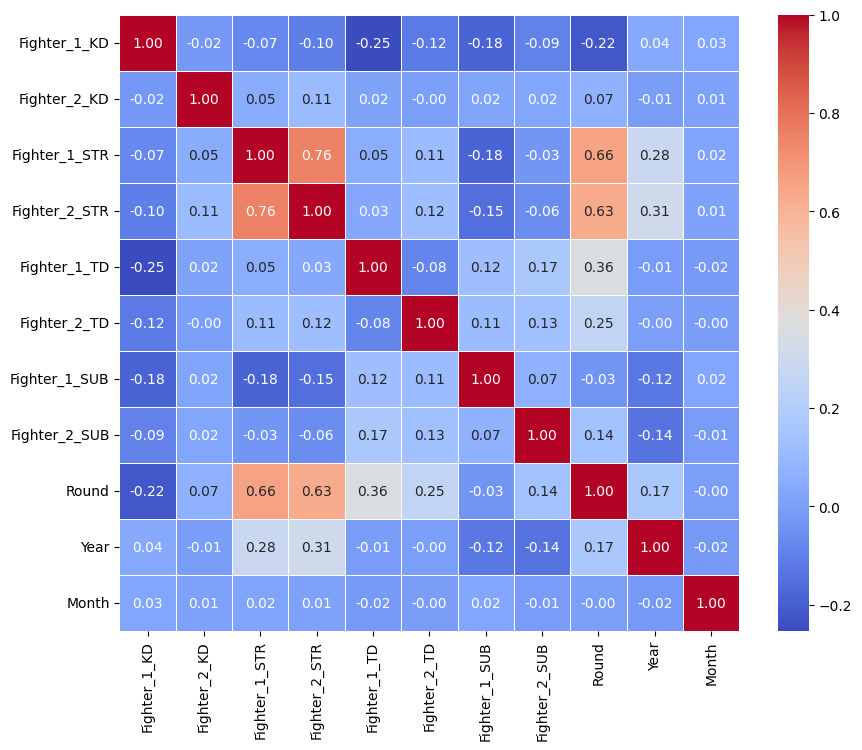

In [20]:
# Calculate correlation matrix for all columns
correlation_matrix = modi_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)



In [21]:
print(modi_data.dtypes)

Location                  object
Fighter 1                 object
Fighter 2                 object
Fighter_1_KD             float64
Fighter_2_KD             float64
Fighter_1_STR            float64
Fighter_2_STR            float64
Fighter_1_TD             float64
Fighter_2_TD             float64
Fighter_1_SUB            float64
Fighter_2_SUB            float64
Weight_Class              object
Method                    object
Round                    float64
Time             timedelta64[ns]
Event Name                object
Date              datetime64[ns]
Winner                    object
Year                       int64
Month                      int64
Loser                     object
dtype: object


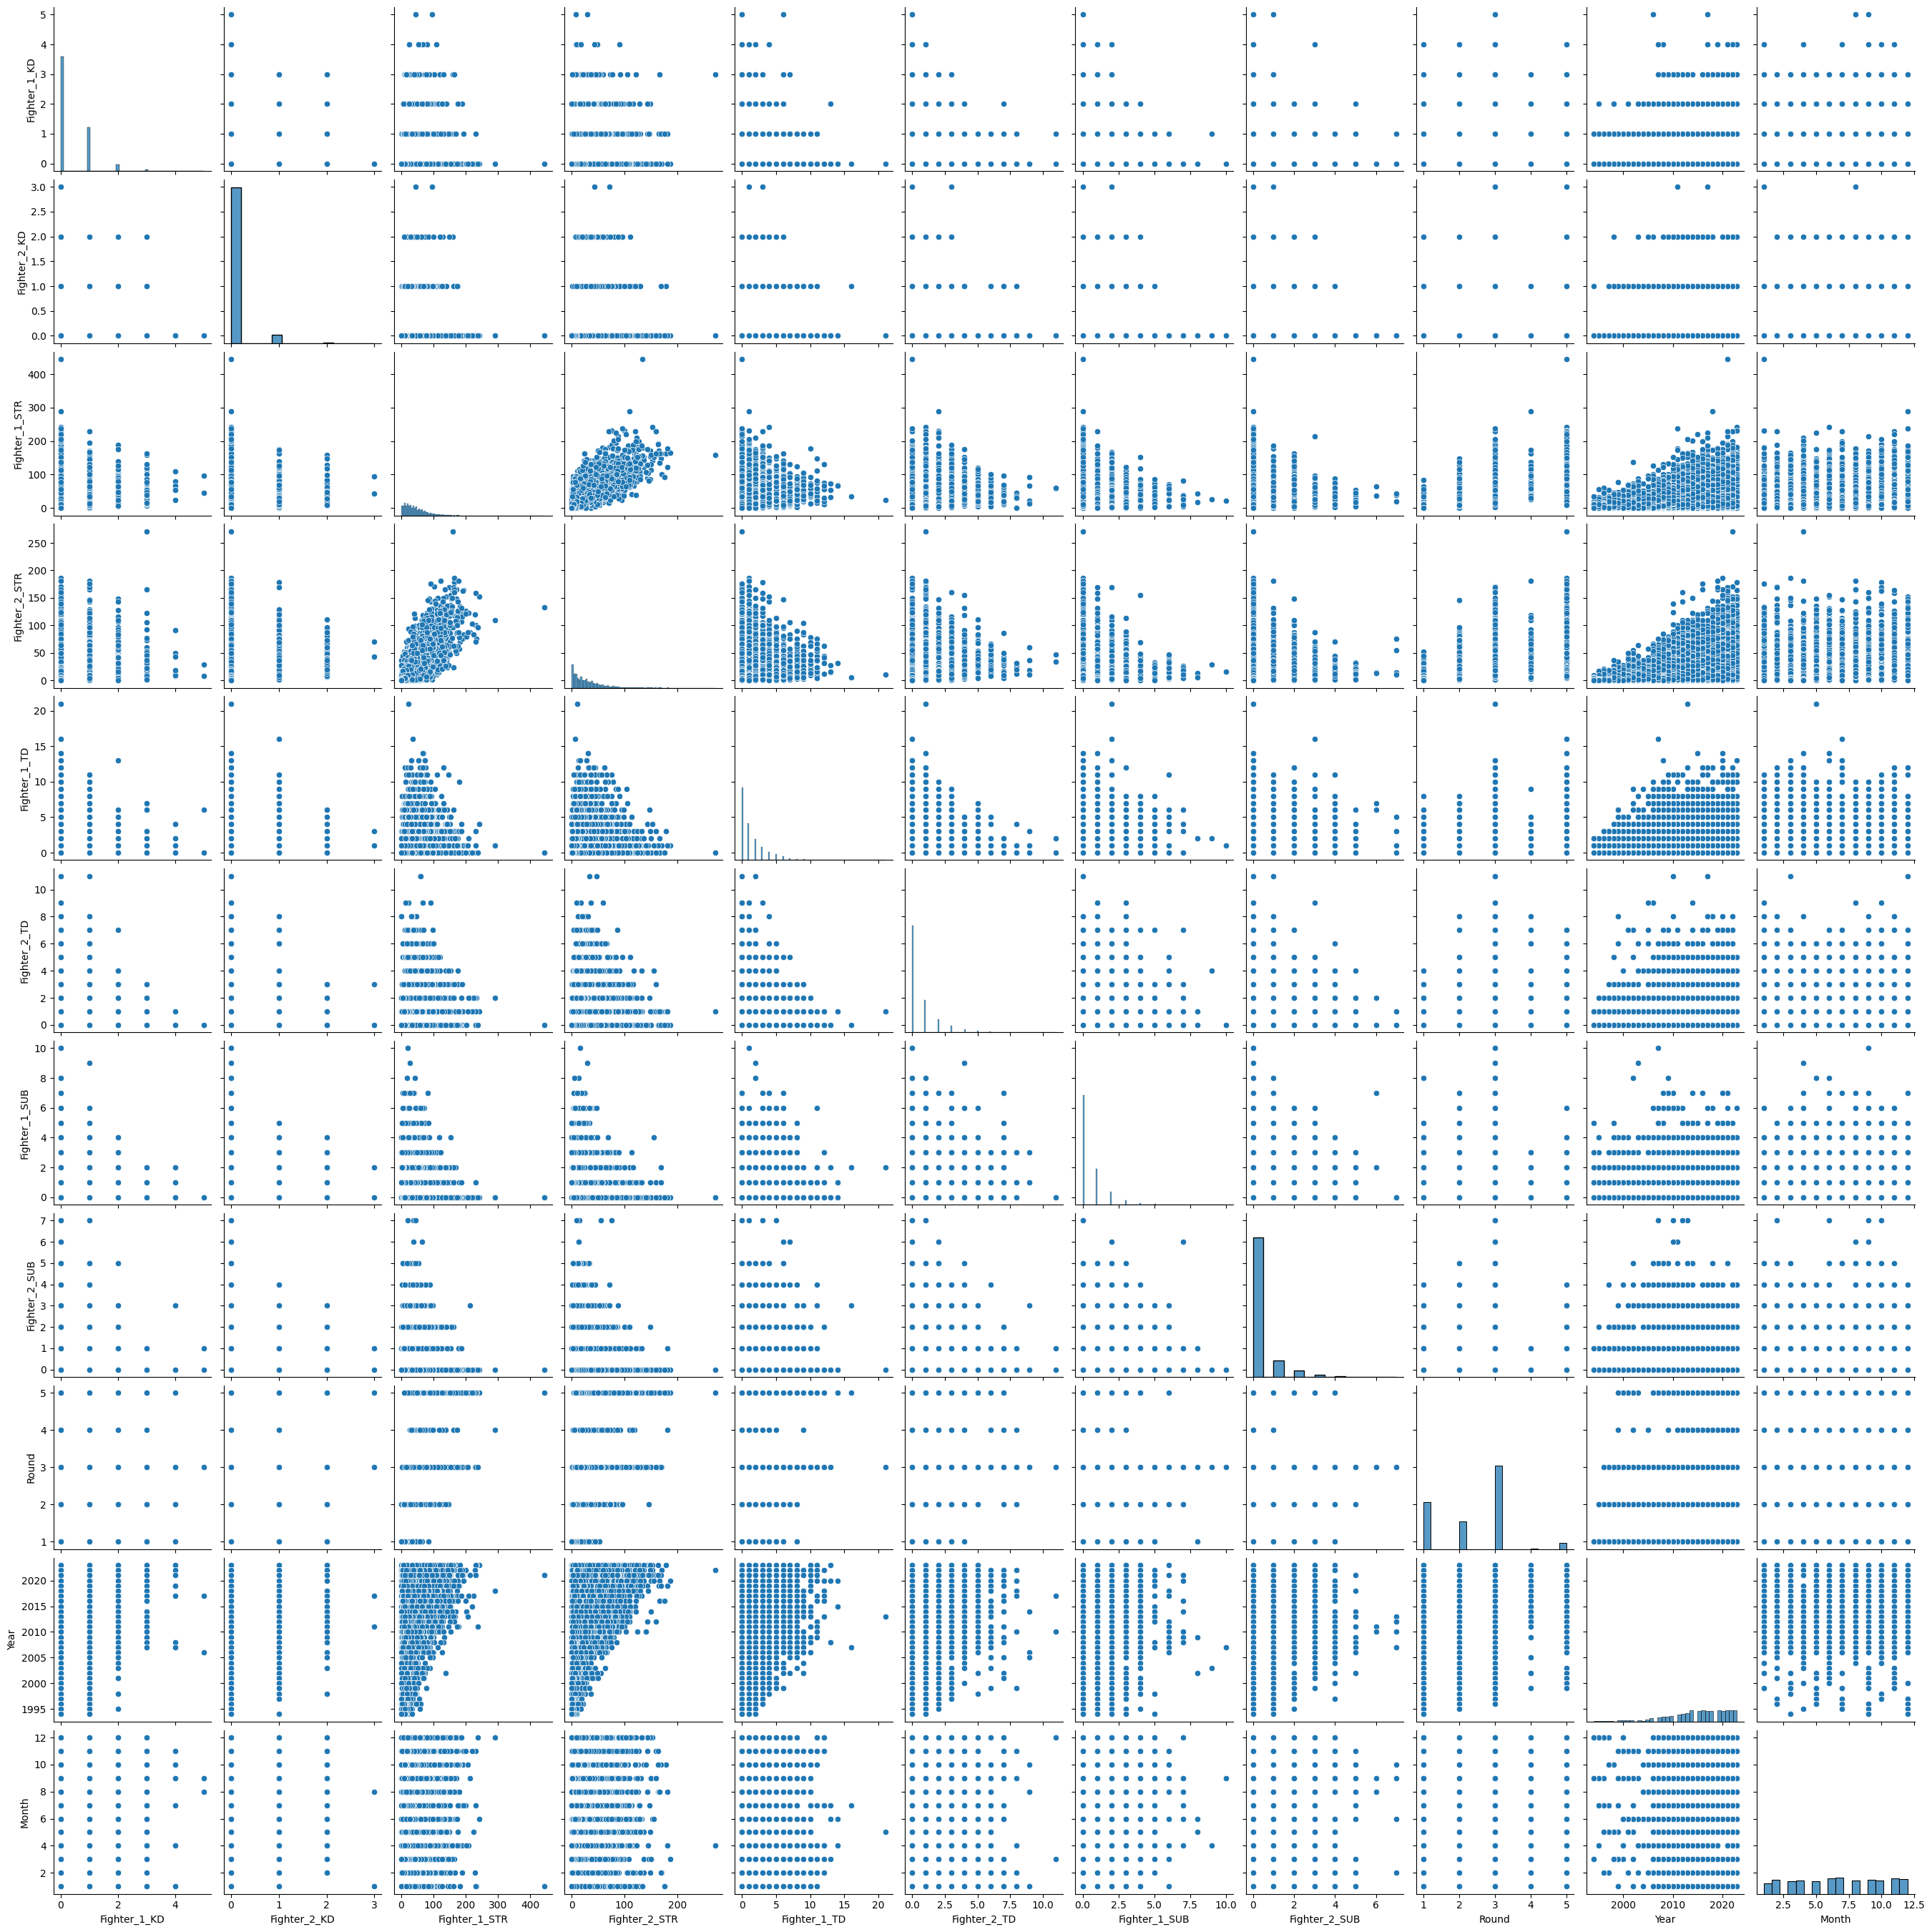

In [22]:
# Pairplot for all variables
sns.pairplot(modi_data)
plt.show()

## Q1. What are the most popular methods of finish and how many bouts have been won by each

---

In [23]:
unique_methods = modi_data['Method'].unique()

In [24]:
print("We have",len(unique_methods),"unique methods.\n")
print("And Number of victories by:\n\n",modi_data['Method'].value_counts())

We have 70 unique methods.

And Number of victories by:

 U-DEC                          2609
KO/TKO Punches                  914
KO/TKO Punch                    812
S-DEC                           704
SUB Rear Naked Choke            563
                               ... 
Overturned Knee                   1
Overturned Rear Naked Choke       1
KO/TKO Headbutts                  1
KO/TKO Headbutt                   1
Overturned D'Arce Choke           1
Name: Method, Length: 70, dtype: int64


- ! Finding number of fights rendered overturned :

In [25]:
overturned_count = modi_data['Method'].str.startswith('Overturned').sum()
print(overturned_count)

56


In [26]:
# Filter the DataFrame for rows where 'Method' begins with 'CNC'
cnc_rows = modi_data[modi_data['Method'].str.startswith('Overturned')]

# Count the occurrences for each unique value of 'Weight_Class' in the filtered DataFrame
cnc_counts_by_weight_class = cnc_rows['Weight_Class'].value_counts()

print("Number of values of 'Method' beginning with 'Overturned' for each unique value of 'Weight_Class':")
print(cnc_counts_by_weight_class)

Number of values of 'Method' beginning with 'Overturned' for each unique value of 'Weight_Class':
Welterweight            9
Light Heavyweight       9
Bantamweight            8
Heavyweight             8
Lightweight             6
Middleweight            6
Featherweight           5
Flyweight               2
Women's Bantamweight    2
Catch Weight            1
Name: Weight_Class, dtype: int64


- ! Finding number of fights rendered CNC (cancelled/could not continue):

In [27]:
cnc_count = modi_data['Method'].str.startswith('CNC').sum()
print(cnc_count)

25


In [28]:
# Filter the DataFrame for rows where 'Method' begins with 'CNC'
cnc_rows = modi_data[modi_data['Method'].str.startswith('CNC')]

# Count the occurrences for each unique value of 'Round' in the filtered DataFrame
cnc_counts_by_round = cnc_rows['Round'].value_counts()

print("Number of values of 'Method' beginning with 'CNC' for each unique value of 'Round':")
print(cnc_counts_by_round)

Number of values of 'Method' beginning with 'CNC' for each unique value of 'Round':
2.0    13
1.0    12
Name: Round, dtype: int64


In [29]:
# Filter the DataFrame for rows where 'Method' begins with 'CNC'
cnc_rows = modi_data[modi_data['Method'].str.startswith('CNC')]

# Count the occurrences for each unique value of 'Weight_Class' in the filtered DataFrame
cnc_counts_by_weight_class = cnc_rows['Weight_Class'].value_counts()

print("Number of values of 'Method' beginning with 'CNC' for each unique value of 'Weight_Class':")
print(cnc_counts_by_weight_class)

Number of values of 'Method' beginning with 'CNC' for each unique value of 'Weight_Class':
Lightweight          7
Bantamweight         5
Light Heavyweight    3
Middleweight         3
Featherweight        3
Heavyweight          2
Welterweight         2
Name: Weight_Class, dtype: int64


---
- We can see that we have 70 different specific methods with each having own finishing move, let us consider the following basic methods :
1. Decision (Unianimous/Split/Majority)
2. KO/TKO
3. Submission

Now we will calculate the number of victories by the above listed methods.

First we'll define a list to track and separately manage every instance.

In [30]:
decisions=[]
ktkos=[]
submissions=[]
overturned=[]

In [31]:
for x in modi_data['Method'] :
    if 'KO/TKO' in x:
        ktkos.append(x)
    elif 'SUB' in x:
        submissions.append(x)
    elif 'DEC' in x:
        decisions.append(x)
    elif 'Overturned' in x:
        overturned.append(x)        

Now, we can examine each method separately.

### First, we will we see Decisions.

In [32]:
all_decs = pd.DataFrame(decisions, columns=['Decision'])
print(all_decs.shape)
all_decs['Decision'].value_counts()   

(3404, 1)


U-DEC    2609
S-DEC     704
M-DEC      91
Name: Decision, dtype: int64

### Next, we will see Submissions

In [33]:
all_submissions = pd.DataFrame(submissions,columns=['Submissions'])
print(all_submissions.shape)
print(all_submissions['Submissions'].value_counts())

(1468, 1)
SUB Rear Naked Choke          563
SUB Guillotine Choke          262
SUB Armbar                    177
SUB Arm Triangle              104
SUB Triangle Choke             92
SUB Kimura                     41
SUB D'Arce Choke               39
SUB Anaconda Choke             29
SUB Kneebar                    20
SUB Heel Hook                  18
SUB Neck Crank                 14
SUB Triangle Armbar            11
SUB Ankle Lock                  9
SUB Injury                      8
SUB Von Flue Choke              8
SUB Keylock                     8
SUB Bulldog Choke               7
SUB Scarf Hold                  7
SUB Other                       6
SUB Forearm Choke               5
SUB North-South Choke           5
SUB Inverted Triangle           4
SUB Ezekiel Choke               4
SUB Suloev Stretch              3
SUB Straight Armbar             3
SUB Other - Lock                3
SUB Twister                     3
SUB Schultz Front Headlock      2
SUB Peruvian Necktie            2
SUB 

### Now, we will see knockouts.

In [34]:
ktkos = pd.DataFrame(ktkos, columns=['Knockout'])
print(ktkos.shape)
ktkos['Knockout'].value_counts()   

(2436, 1)


KO/TKO Punches                914
KO/TKO Punch                  812
KO/TKO Kick                   181
KO/TKO                        149
KO/TKO Elbows                 124
KO/TKO Knee                    98
KO/TKO Elbow                   36
KO/TKO Knees                   35
KO/TKO Flying Knee             34
KO/TKO Slam                    14
KO/TKO Kicks                   10
KO/TKO Spinning Back Kick      10
KO/TKO Spinning Back Fist      10
KO/TKO Spinning Back Elbow      7
KO/TKO Headbutts                1
KO/TKO Headbutt                 1
Name: Knockout, dtype: int64

---

## Q2. What round did most fights end in ?

In [35]:
print(modi_data['Round'].value_counts())

3.0    3735
1.0    2123
2.0    1241
5.0     271
4.0      42
Name: Round, dtype: int64


---

## Q3. What is the most popular method of victory for each weight class ?

In [36]:
weightcls = modi_data['Weight_Class'].unique()

print(weightcls)

['Lightweight' 'Bantamweight' 'Welterweight' 'Middleweight'
 "Women's Bantamweight" 'Light Heavyweight' "Women's Flyweight"
 "Women's Strawweight" 'Featherweight' 'Heavyweight' 'Flyweight'
 'Catch Weight' "Women's Featherweight" 'Super Heavyweight' 'Open Weight']


In [37]:
for x in weightcls:
    
    filtered_df = modi_data[modi_data['Weight_Class'] == x]
    
    count_values = filtered_df['Method'].value_counts()
    
    print("For",x,"division :\n\n",count_values,"\n\n")


For Lightweight division :

 U-DEC                          464
KO/TKO Punch                   134
SUB Rear Naked Choke           134
S-DEC                          129
KO/TKO Punches                 122
SUB Guillotine Choke            50
KO/TKO Kick                     35
KO/TKO                          29
SUB Armbar                      26
M-DEC                           21
SUB Triangle Choke              20
KO/TKO Knee                     14
KO/TKO Elbows                   13
SUB D'Arce Choke                11
SUB Arm Triangle                10
SUB Kimura                       9
CNC                              7
KO/TKO Knees                     5
KO/TKO Flying Knee               5
Overturned                       4
SUB Kneebar                      4
KO/TKO Elbow                     3
KO/TKO Kicks                     3
SUB Ankle Lock                   3
KO/TKO Spinning Back Fist        3
SUB Inverted Triangle            3
KO/TKO Slam                      3
SUB Anaconda Choke        

#### For simplicity, let us only print the top 4 methods of victory in each weight class :

In [38]:
for x in weightcls:
    filtered_df = modi_data[modi_data['Weight_Class'] == x]
    count_values = filtered_df['Method'].value_counts()
    print("For",x,"division :\n\n",count_values.nlargest(4),"\n\n")


For Lightweight division :

 U-DEC                   464
KO/TKO Punch            134
SUB Rear Naked Choke    134
S-DEC                   129
Name: Method, dtype: int64 


For Bantamweight division :

 U-DEC             230
S-DEC              75
KO/TKO Punches     67
KO/TKO Punch       67
Name: Method, dtype: int64 


For Welterweight division :

 U-DEC             451
KO/TKO Punch      137
KO/TKO Punches    131
S-DEC             123
Name: Method, dtype: int64 


For Middleweight division :

 U-DEC             297
KO/TKO Punches    147
KO/TKO Punch      103
S-DEC              81
Name: Method, dtype: int64 


For Women's Bantamweight division :

 U-DEC             89
S-DEC             25
KO/TKO Punches    17
SUB Armbar        10
Name: Method, dtype: int64 


For Light Heavyweight division :

 U-DEC             189
KO/TKO Punches    109
KO/TKO Punch      104
S-DEC              50
Name: Method, dtype: int64 


For Women's Flyweight division :

 U-DEC                   98
S-DEC             

---

## Q4. Which weight class has the most KO/TKO wins ?

Let us create a dictionary to store the number of knockouts in each weight class and arrange it in ascending order.

In [39]:
ko_wc={}

sub_wc={}


for i in weightcls:
    ko_wc[i]=0
    sub_wc[i]=0
    count = modi_data[modi_data['Weight_Class'] == i ]['Method'].value_counts()
    for j in count.index :
        if 'KO/TKO' in j:
            ko_wc[i]+=count[j]
        if 'SUB' in j:
            sub_wc[i]+=count[j]
            
            
ko_wc = dict(sorted(ko_wc.items(), key=lambda item: item[1]))

sub_wc = dict(sorted(sub_wc.items(), key=lambda item: item[1]))

In [40]:
print("The top 3 weight classes with most knockouts are ",dict(list(ko_wc.items())[-5:]))

The top 3 weight classes with most knockouts are  {'Light Heavyweight': 290, 'Heavyweight': 362, 'Lightweight': 371, 'Middleweight': 375, 'Welterweight': 402}


---

## Q5. Which weight class has the most submission wins ?

In [41]:
print("The top 3 weight classes with most submissions are ",dict(list(sub_wc.items())[-5:]))

The top 3 weight classes with most submissions are  {'Featherweight': 118, 'Bantamweight': 129, 'Middleweight': 216, 'Welterweight': 239, 'Lightweight': 288}


---

## Q6. What is the average fight duration ?

In [42]:
average_seconds = modi_data['Time'].dt.total_seconds().mean()


average_time = pd.Timedelta(seconds=average_seconds)

print("Average bout duration is",average_time.components.minutes,":",average_time.components.seconds)


Average bout duration is 3 : 47


## Q7. Which fighter has won the most overall ?

The top 4 fighters in terms of number of victories are :

In [43]:
print(modi_data['Winner'].value_counts().sort_values(ascending=False)[0:4])

Jim Miller         26
Andrei Arlovski    24
Donald Cerrone     24
Demian Maia        22
Name: Winner, dtype: int64


## Q8. Which fighter has the most wins in their own weight class ?

In [44]:
most_wins_by_weight_class = modi_data.groupby(['Weight_Class', 'Winner'])['Winner'].count().reset_index(name='Wins')

most_wins_by_weight_class = most_wins_by_weight_class.loc[most_wins_by_weight_class.groupby('Weight_Class')['Wins'].idxmax()]

print(most_wins_by_weight_class)

               Weight_Class              Winner  Wins
7              Bantamweight   Aljamain Sterling    14
195            Catch Weight        Casey Kenney     2
400           Featherweight        Max Holloway    20
505               Flyweight  Demetrious Johnson    14
587             Heavyweight     Andrei Arlovski    24
830       Light Heavyweight           Jon Jones    20
1065            Lightweight          Jim Miller    23
1443           Middleweight     Michael Bisping    16
1539            Open Weight          Dan Severn     9
1574      Super Heavyweight        Josh Barnett     1
1802           Welterweight          Neil Magny    21
1907   Women's Bantamweight        Amanda Nunes    13
1975  Women's Featherweight        Norma Dumont     5
2006      Women's Flyweight   Katlyn Chookagian     9
2056    Women's Strawweight         Angela Hill    10


## Q9. Which event saw the most submissions ?

In [45]:
sub_df = modi_data[modi_data['Method'].str.startswith('SUB')]

# Group by 'Event Name' and 'Date' and count the occurrences
count_df = sub_df.groupby(['Event Name', 'Date']).size().reset_index(name='Count')

# Find the combination with the maximum count
max_count_combination = count_df.loc[count_df['Count'].idxmax()]

print("Event Name with most submission wins:", max_count_combination['Event Name'],"on",max_count_combination['Date'])

Event Name with most submission wins: UFC 2 on 1994-03-11 00:00:00


## Q10. Which event saw the most knockouts and decisions ?

In [46]:
sub_df = modi_data[modi_data['Method'].str.startswith('KO/TKO')]

# Group by 'Event Name' and 'Date' and count the occurrences
count_df = sub_df.groupby(['Event Name', 'Date']).size().reset_index(name='Count')

# Find the combination with the maximum count
max_count_combination = count_df.loc[count_df['Count'].idxmax()]

print("Event Name with most SUB wins:", max_count_combination['Event Name'],"on",max_count_combination['Date'])

Event Name with most SUB wins: UFC 199 on 2016-06-04 00:00:00


In [47]:
dec_df = modi_data[modi_data['Method'].str.contains('DEC')]

# Group by 'Event Name' and 'Date' and count the occurrences
count_df1 = dec_df.groupby(['Event Name', 'Date']).size().reset_index(name='Count')

# Find the combination with the maximum count
max_count_combination1 = count_df1.loc[count_df1['Count'].idxmax()]

print("Event Name with most DEC wins:", max_count_combination1['Event Name'],"on",max_count_combination1['Date'])

Event Name with most DEC wins: UFC Fight Night on 2014-10-04 00:00:00


In [48]:
sdec_df = modi_data[modi_data['Method'].str.contains('S-DEC')]

# Group by 'Event Name' and 'Date' and count the occurrences
count_df2 = sdec_df.groupby(['Event Name', 'Date']).size().reset_index(name='Count')

# Find the combination with the maximum count
max_count_combination2 = count_df2.loc[count_df2['Count'].idxmax()]

print("Event Name with most SDEC wins:", max_count_combination2['Event Name'],"on",max_count_combination2['Date'])

Event Name with most SDEC wins: UFC 222 on 2018-03-03 00:00:00


## Q11. Which venues have hosted the most events ?

In [49]:
modi_data['Location'].value_counts().sort_values(ascending=False).head(5)

Las Vegas, Nevada, USA                        2411
Abu Dhabi, Abu Dhabi, United Arab Emirates     196
London, England, United Kingdom                170
Houston, Texas, USA                            108
Newark, New Jersey, USA                        102
Name: Location, dtype: int64

## Q12. Which venue has hosted the most knockouts ?

In [50]:
# Filter rows where Method starts with 'KO/TKO'
ko_tko_df = modi_data[modi_data['Method'].str.startswith('KO/TKO')]

# Group by 'Location' and count the occurrences
count_df = ko_tko_df.groupby('Location').size().reset_index(name='Count')

# Find the location with the maximum count
max_count_location = count_df.loc[count_df['Count'].idxmax()]

print("Location with the most knockout wins:", max_count_location['Location'])

Location with the most knockout wins: Las Vegas, Nevada, USA


## Q13. Which venue has hosted the most submissions ?

In [51]:
sub_df1 = modi_data[modi_data['Method'].str.startswith('SUB')]

# Group by 'Location' and count the occurrences
count_by_location1 = sub_df1.groupby('Location').size()

# Find the location with the most SUB methods
location_with_most_sub1 = count_by_location1.idxmax()

print("Location with most submission wins :", location_with_most_sub1)

Location with most submission wins : Las Vegas, Nevada, USA


## Q14. Which venue has hosted the most decision wins ?

In [52]:
dec_df = modi_data[modi_data['Method'].str.contains('DEC')]

# Group by 'Location' and count the occurrences
count_df = dec_df.groupby('Location').size().reset_index(name='Count')

# Find the location with the maximum count
max_count_location = count_df.loc[count_df['Count'].idxmax()]

print("Location with most DEC Method values:", max_count_location['Location'])

Location with most DEC Method values: Las Vegas, Nevada, USA


## Q15. Which fighter has lost the most by submission ?

In [53]:
sub_df = modi_data[modi_data['Method'].str.startswith('SUB')]

# Group by 'Loser' and count the occurrences
count_df = sub_df.groupby('Loser').size().reset_index(name='Count')

# Find the Loser who has lost the most by a method starting with 'SUB'
most_lost_sub_loser = count_df.loc[count_df['Count'].idxmax()]

print("Fighter who has lost the most by submission :", most_lost_sub_loser['Loser'])

Fighter who has lost the most by submission : Clay Guida


## Q16. Which fighter has lost the most by knockout ?

In [54]:
kto_df = modi_data[modi_data['Method'].str.startswith('KO/TKO')]

# Group by 'Loser' and count the occurrences
count_df = kto_df.groupby('Loser').size().reset_index(name='Count')

# Find the Loser who has lost the most by a method starting with 'SUB'
most_lost_sub_loser = count_df.loc[count_df['Count'].idxmax()]

print("Fighter who has lost the most by knockout :", most_lost_sub_loser['Loser'])

Fighter who has lost the most by knockout : Alistair Overeem


## Q17. Which fighter lost the most by decision ?

In [55]:
dec_df = modi_data[modi_data['Method'].str.contains('DEC')]

# Group by 'Loser' and count the occurrences
count_df = dec_df.groupby('Loser').size().reset_index(name='Count')

# Find the Loser who has lost the most by a method starting with 'SUB'
most_dec_loser = count_df.loc[count_df['Count'].idxmax()]

print("Fighter who has lost the most by decision :", most_dec_loser['Loser'])

Fighter who has lost the most by decision : Jeremy Stephens


## Q18. Which fighter lost the most by split decision ?

In [56]:
dec_df = modi_data[modi_data['Method'].str.contains('S-DEC')]

# Group by 'Loser' and count the occurrences
count_df = dec_df.groupby('Loser').size().reset_index(name='Count')

# Find the Loser who has lost the most by a method starting with 'SUB'
most_sdec_loser = count_df.loc[count_df['Count'].idxmax()]

print("Fighter who has lost the most by split decision :", most_sdec_loser['Loser'])

Fighter who has lost the most by split decision : Angela Hill


## Q19. Which fighter has the most wins by knockout ?

In [57]:
kto_df = modi_data[modi_data['Method'].str.startswith('KO/TKO')]

# Group by 'Loser' and count the occurrences
count_df = kto_df.groupby('Winner').size().reset_index(name='Count')

# Find the Loser who has lost the most by a method starting with 'SUB'
most_ko_winner = count_df.loc[count_df['Count'].idxmax()]

print("Fighter who has won the most by knockout :", most_ko_winner['Winner'])

Fighter who has won the most by knockout : Derrick Lewis


## Q20. Which fighter has the most wins by submission ?

In [58]:
sub_df = modi_data[modi_data['Method'].str.startswith('SUB')]

# Group by 'Loser' and count the occurrences
count_df = sub_df.groupby('Winner').size().reset_index(name='Count')

# Find the Loser who has lost the most by a method starting with 'SUB'
most_sub_winner = count_df.loc[count_df['Count'].idxmax()]

print("Fighter who has won the most by knockout :", most_sub_winner['Winner'])

Fighter who has won the most by knockout : Charles Oliveira


## Q21. Which fighter has the most wins by decision ?

In [59]:
dec_df = modi_data[modi_data['Method'].str.contains('DEC')]

# Group by 'Loser' and count the occurrences
count_df = dec_df.groupby('Winner').size().reset_index(name='Count')

# Find the Loser who has lost the most by a method starting with 'SUB'
most_dec_winner = count_df.loc[count_df['Count'].idxmax()]

print("Fighter who has won the most by decision :", most_dec_winner['Winner'])

Fighter who has won the most by decision : Neil Magny


## Q22. Which fighter has the most wins by split decision ?

In [60]:
dec_df = modi_data[modi_data['Method'].str.contains('S-DEC')]

# Group by 'Loser' and count the occurrences
count_df = dec_df.groupby('Winner').size().reset_index(name='Count')

# Find the Loser who has lost the most by a method starting with 'SUB'
most_sdec_winner = count_df.loc[count_df['Count'].idxmax()]

print("Fighter who has won the most by split decision :", most_sdec_winner['Winner'])

Fighter who has won the most by split decision : Gleison Tibau


## Q23. Which fighter has the most wins by Rear Naked Choke ?

In [61]:
rnc_df = modi_data[modi_data['Method'].str.contains('Rear Naked Choke')]

# Group by 'Loser' and count the occurrences
count_df = rnc_df.groupby('Winner').size().reset_index(name='Count')

# Find the Loser who has lost the most by a method starting with 'SUB'
most_rnc_winner = count_df.loc[count_df['Count'].idxmax()]

print("Fighter who has won the most by RNC:", most_rnc_winner['Winner'])

Fighter who has won the most by RNC: Demian Maia


## Q24. Which fighter has the most wins by Armbar ?

In [62]:
ab_df = modi_data[modi_data['Method'].str.contains('Armbar')]

# Group by 'Loser' and count the occurrences
count_df = ab_df.groupby('Winner').size().reset_index(name='Count')

# Find the Loser who has lost the most by a method starting with 'SUB'
most_ab_winner = count_df.loc[count_df['Count'].idxmax()]

print("Fighter who has won the most by Armbar:", most_ab_winner['Winner'])

Fighter who has won the most by Armbar: Demetrious Johnson


## Q25. Which month has seen the most submission wins ?

In [63]:
# Convert 'Date' column to datetime with '%Y-%m-%d' format
#modi_data['Date'] = pd.to_datetime(modi_data['Date'], format='%Y-%m-%d')

# Extract month from 'Date' column
#modi_data['Month'] = modi_data['Date'].dt.month

# Filter rows where Method starts with 'SUB'
sub_df = modi_data[modi_data['Method'].str.startswith('SUB')]

# Group by 'Month' and count the occurrences
count_df = sub_df.groupby('Month').size().reset_index(name='Count')

# Find the month with the most Method values beginning with 'SUB'
most_sub_month = count_df.loc[count_df['Count'].idxmax()]

print("Month of the year that has seen the most submissions :", calendar.month_name[most_sub_month['Month']])

Month of the year that has seen the most submissions : December


## Q26. Which month has seen the most knockout wins ?

In [64]:
# Filter rows where Method starts with 'SUB'
sub_df = modi_data[modi_data['Method'].str.startswith('KO/TKO')]

# Group by 'Month' and count the occurrences
count_df = sub_df.groupby('Month').size().reset_index(name='Count')

# Find the month with the most Method values beginning with 'SUB'
most_sub_month = count_df.loc[count_df['Count'].idxmax()]

print("Month of the year that has seen the most knockouts :", calendar.month_name[most_sub_month['Month']])

Month of the year that has seen the most knockouts : July


## Q27. What are the number of knockouts each year ?

In [65]:
# Filter rows where 'Method' starts with 'KO/TKO' and count occurrences for each year
result = modi_data[modi_data['Method'].str.startswith('KO/TKO')].groupby('Year').size()

print(result)

Year
1994     10
1995     11
1996     23
1997     12
1998      7
1999     26
2000     14
2001     17
2002     29
2003     18
2004     18
2005     39
2006     59
2007     53
2008     85
2009     75
2010     69
2011     95
2012    105
2013    130
2014    152
2015    155
2016    153
2017    146
2018    151
2019    153
2020    139
2021    171
2022    171
2023    150
dtype: int64


## Q28. What are the number of submissions each year ?

In [66]:
print(modi_data[modi_data['Method'].str.startswith('SUB')].groupby('Year').size())

Year
1994    19
1995    18
1996     9
1997    18
1998     7
1999     7
2000    11
2001     9
2002     8
2003     8
2004    11
2005    21
2006    47
2007    54
2008    51
2009    46
2010    59
2011    55
2012    70
2013    67
2014    95
2015    88
2016    89
2017    80
2018    90
2019    80
2020    82
2021    73
2022    98
2023    98
dtype: int64


## Q29. What are the number of decision victories each year ?

In [67]:
print(modi_data[modi_data['Method'].str.contains('DEC')].groupby('Year').size())

Year
1995      3
1996      4
1997      8
1998      7
1999     11
2000     17
2001     12
2002     15
2003     14
2004     10
2005     19
2006     52
2007     62
2008     64
2009     92
2010    124
2011    147
2012    158
2013    179
2014    247
2015    221
2016    248
2017    224
2018    229
2019    277
2020    226
2021    256
2022    239
2023    239
dtype: int64


In [68]:
df = modi_data.copy()

## Q30. How often does number of significant strikes landed indicate a knockout victory?

In [69]:
def has_strikes_advantage(row):
    if row['Winner'] == row['Fighter 1']:
        return row['Fighter_1_STR'] > row['Fighter_2_STR']
    else:
        return row['Fighter_2_STR'] > row['Fighter_1_STR']

# Filter rows where Method begins with 'KO/TKO'
ko_tko_df = df[df['Method'].str.startswith('KO/TKO')]

# Count occurrences where winning fighter has an advantage in strikes landed
advantage_count = ko_tko_df.apply(has_strikes_advantage, axis=1).sum()

total_ko = len(ktkos)

percent = advantage_count/total_ko*100

print("Number of times having an advantage in number of strikes landed resulted in KO/TKO method:\n\n", advantage_count,\
      " times for",len(ktkos),"fights which  ended via KO/TKO, \n\n i.e.",round(percent,2),"% times having a striking advantage leads to a knockout victory")

Number of times having an advantage in number of strikes landed resulted in KO/TKO method:

 2071  times for 2436 fights which  ended via KO/TKO, 

 i.e. 85.02 % times having a striking advantage leads to a knockout victory


## Q31. How often does advantage in number of submission attempts indicate a submission victory?

In [70]:
def has_sub_advantage(row):
    if row['Winner'] == row['Fighter 1']:
        return row['Fighter_1_SUB'] > row['Fighter_2_SUB']
    else:
        return row['Fighter_2_SUB'] > row['Fighter_1_SUB']

# Filter rows where Method begins with 'KO/TKO'
sub_df = df[df['Method'].str.startswith('SUB')]

# Count occurrences where winning fighter has an advantage in strikes landed
advantage_count = sub_df.apply(has_sub_advantage, axis=1).sum()

total_sub = len(submissions)

percent = advantage_count/total_sub*100

print("Number of times having an advantage in number of submission attempts landed resulted in SUB method:\n\n", advantage_count,\
      " times for",len(submissions),"fights which  ended via Submission, \n\n i.e.",round(percent,2),"% times having a submission attempt advantage leads to a submission victory")

Number of times having an advantage in number of submission attempts landed resulted in SUB method:

 1283  times for 1468 fights which  ended via Submission, 

 i.e. 87.4 % times having a submission attempt advantage leads to a submission victory


## Q32. How often does advantage in number of takedowns attempts indicate a submission victory?

In [71]:
def has_td_advantage(row):
    if row['Winner'] == row['Fighter 1']:
        return row['Fighter_1_TD'] > row['Fighter_2_TD']
    else:
        return row['Fighter_2_TD'] > row['Fighter_1_TD']

# Filter rows where Method begins with 'KO/TKO'
subtd_df = df[df['Method'].str.startswith('SUB')]

# Count occurrences where winning fighter has an advantage in strikes landed
advantage_count = subtd_df.apply(has_td_advantage, axis=1).sum()

total_sub = len(submissions)

percent = advantage_count/total_sub*100

print("Number of times having an advantage in number of takedown attempts landed resulted in SUB method:\n\n", advantage_count,\
      " times for",len(submissions),"fights which  ended via submission, \n\n i.e.",round(percent,2),"% times having a wrestling advantage leads to a submission victory")

Number of times having an advantage in number of takedown attempts landed resulted in SUB method:

 788  times for 1468 fights which  ended via submission, 

 i.e. 53.68 % times having a wrestling advantage leads to a submission victory


## Q33. How often does advantage in number of takedowns attempts indicate a decision victory - and related questions 

In [72]:
def has_td_advantage(row):
    if row['Winner'] == row['Fighter 1']:
        return row['Fighter_1_TD'] > row['Fighter_2_TD']
    else:
        return row['Fighter_2_TD'] > row['Fighter_1_TD']

# Filter rows where Method begins with 'KO/TKO'
dec_df = df[df['Method'].str.contains('DEC')]

# Count occurrences where winning fighter has an advantage in strikes landed
advantage_count = dec_df.apply(has_td_advantage, axis=1).sum()

total_dec = len(decisions)

percent = advantage_count/total_dec*100

print("Number of times having an advantage in number of takedown attempts landed resulted in DECISION method:\n\n", advantage_count,\
      " times for",len(decisions),"fights which ended via decision, \n\n i.e.",round(percent,2),"% times having a wrestling advantage leads to a decision victory")

Number of times having an advantage in number of takedown attempts landed resulted in DECISION method:

 1858  times for 3404 fights which ended via decision, 

 i.e. 54.58 % times having a wrestling advantage leads to a decision victory


In [73]:
def has_td_advantage(row):
    if row['Winner'] == row['Fighter 1']:
        return row['Fighter_1_TD'] > row['Fighter_2_TD']
    else:
        return row['Fighter_2_TD'] > row['Fighter_1_TD']

# Filter rows where Method begins with 'KO/TKO'
dec_df = df[df['Method'].str.contains('KO/TKO')]

# Count occurrences where winning fighter has an advantage in strikes landed
advantage_count = dec_df.apply(has_td_advantage, axis=1).sum()

total_dec = len(decisions)

percent = advantage_count/total_dec*100

print("Number of times having an advantage in number of takedown attempts landed resulted in KO/TKO method:\n\n", advantage_count,\
      " times for",len(decisions),"fights which ended via decision, \n\n i.e.",round(percent,2),"% times having a wrestling advantage leads to a knockout victory")

Number of times having an advantage in number of takedown attempts landed resulted in KO/TKO method:

 655  times for 3404 fights which ended via decision, 

 i.e. 19.24 % times having a wrestling advantage leads to a knockout victory


In [74]:
def has_strikes_advantage(row):
    if row['Winner'] == row['Fighter 1']:
        return row['Fighter_1_STR'] > row['Fighter_2_STR']
    else:
        return row['Fighter_2_STR'] > row['Fighter_1_STR']

# Filter rows where Method begins with 'KO/TKO'
ko_tko_df = df[df['Method'].str.startswith('SUB')]

# Count occurrences where winning fighter has an advantage in strikes landed
advantage_count = ko_tko_df.apply(has_strikes_advantage, axis=1).sum()

total_ko = len(ktkos)

percent = advantage_count/total_ko*100

print("Number of times having an advantage in number of strikes landed resulted in SUB method:\n\n", advantage_count,\
      " times for",len(ktkos),"fights which  ended via KO/TKO, \n\n i.e.",round(percent,2),"% times having a striking advantage leads to a SUB victory")

Number of times having an advantage in number of strikes landed resulted in SUB method:

 948  times for 2436 fights which  ended via KO/TKO, 

 i.e. 38.92 % times having a striking advantage leads to a SUB victory


In [75]:
def has_strikes_advantage(row):
    if row['Winner'] == row['Fighter 1']:
        return row['Fighter_1_STR'] > row['Fighter_2_STR']
    else:
        return row['Fighter_2_STR'] > row['Fighter_1_STR']

# Filter rows where Method begins with 'KO/TKO'
ko_tko_df = df[df['Method'].str.contains('DEC')]

# Count occurrences where winning fighter has an advantage in strikes landed
advantage_count = ko_tko_df.apply(has_strikes_advantage, axis=1).sum()

total_ko = len(ktkos)

percent = advantage_count/total_ko*100

print("Number of times having an advantage in number of strikes landed resulted in DEC method:\n\n", advantage_count,\
      " times for",len(ktkos),"fights which  ended via KO/TKO, \n\n i.e.",round(percent,2),"% times having a striking advantage leads to a DEC victory")

Number of times having an advantage in number of strikes landed resulted in DEC method:

 2611  times for 2436 fights which  ended via KO/TKO, 

 i.e. 107.18 % times having a striking advantage leads to a DEC victory


In [76]:
def has_sub_advantage(row):
    if row['Winner'] == row['Fighter 1']:
        return row['Fighter_1_SUB'] > row['Fighter_2_SUB']
    else:
        return row['Fighter_2_SUB'] > row['Fighter_1_SUB']

# Filter rows where Method begins with 'KO/TKO'
sub_df = df[df['Method'].str.startswith('KO/TKO')]

# Count occurrences where winning fighter has an advantage in strikes landed
advantage_count = sub_df.apply(has_sub_advantage, axis=1).sum()

total_sub = len(submissions)

percent = advantage_count/total_sub*100

print("Number of times having an advantage in number of submission attempts landed resulted in KO/TKO method:\n\n", advantage_count,\
      " times for",len(submissions),"fights which  ended via Submission, \n\n i.e.",round(percent,2),"% times having a submission attempt advantage leads to a KO/TKO victory")

Number of times having an advantage in number of submission attempts landed resulted in KO/TKO method:

 203  times for 1468 fights which  ended via Submission, 

 i.e. 13.83 % times having a submission attempt advantage leads to a KO/TKO victory


In [77]:
def has_sub_advantage(row):
    if row['Winner'] == row['Fighter 1']:
        return row['Fighter_1_SUB'] > row['Fighter_2_SUB']
    else:
        return row['Fighter_2_SUB'] > row['Fighter_1_SUB']

# Filter rows where Method begins with 'KO/TKO'
sub_df = df[df['Method'].str.contains('UDEC')]

# Count occurrences where winning fighter has an advantage in strikes landed
advantage_count = sub_df.apply(has_sub_advantage, axis=1).sum()

total_sub = len(submissions)

percent = advantage_count/total_sub*100

print("Number of times having an advantage in number of submission attempts landed resulted in DEC method:\n\n", advantage_count,\
      " times for",len(submissions),"fights which  ended via Submission, \n\n i.e.",round(percent,2),"% times having a submission attempt advantage leads to a decision victory")

Number of times having an advantage in number of submission attempts landed resulted in DEC method:

 0.0  times for 1468 fights which  ended via Submission, 

 i.e. 0.0 % times having a submission attempt advantage leads to a decision victory


## Q34. What round do knockouts happen in each weight class ?

In [78]:
ko_tko_data = data[data['Method'].str.startswith('KO/TKO')]

# Group by 'Weight_Class' and 'Round', and count occurrences
result = ko_tko_data.groupby(['Weight_Class', 'Round']).size().reset_index(name='Count')

print(result)

             Weight_Class  Round  Count
0            Bantamweight    1.0     86
1            Bantamweight    2.0     57
2            Bantamweight    3.0     27
3            Bantamweight    4.0      3
4            Bantamweight    5.0      4
5            Catch Weight    1.0     10
6            Catch Weight    2.0      5
7            Catch Weight    3.0      4
8           Featherweight    1.0    102
9           Featherweight    2.0     51
10          Featherweight    3.0     34
11          Featherweight    4.0      3
12          Featherweight    5.0      1
13              Flyweight    1.0     40
14              Flyweight    2.0     23
15              Flyweight    3.0     10
16            Heavyweight    1.0    207
17            Heavyweight    2.0    104
18            Heavyweight    3.0     42
19            Heavyweight    4.0      4
20            Heavyweight    5.0      5
21      Light Heavyweight    1.0    180
22      Light Heavyweight    2.0     72
23      Light Heavyweight    3.0     33


## Q35. What round do submissions happen in each weight class ?

In [79]:
ko_tko_data = data[data['Method'].str.startswith('SUB')]

# Group by 'Weight_Class' and 'Round', and count occurrences
result = ko_tko_data.groupby(['Weight_Class', 'Round']).size().reset_index(name='Count')

print(result)

             Weight_Class  Round  Count
0            Bantamweight    1.0     57
1            Bantamweight    2.0     43
2            Bantamweight    3.0     27
3            Bantamweight    4.0      2
4            Catch Weight    1.0      9
5            Catch Weight    2.0      3
6            Catch Weight    3.0      3
7           Featherweight    1.0     53
8           Featherweight    2.0     41
9           Featherweight    3.0     22
10          Featherweight    4.0      1
11          Featherweight    5.0      1
12              Flyweight    1.0     31
13              Flyweight    2.0     21
14              Flyweight    3.0     11
15              Flyweight    5.0      3
16            Heavyweight    1.0     68
17            Heavyweight    2.0     25
18            Heavyweight    3.0      9
19      Light Heavyweight    1.0     55
20      Light Heavyweight    2.0     36
21      Light Heavyweight    3.0     15
22      Light Heavyweight    4.0      3
23      Light Heavyweight    5.0      1


## Q36. What weight class had the most fights ?

In [80]:
modi_data['Weight_Class'].value_counts()

Lightweight              1288
Welterweight             1247
Middleweight              989
Featherweight             710
Heavyweight               684
Light Heavyweight         661
Bantamweight              633
Flyweight                 312
Women's Strawweight       285
Women's Flyweight         212
Women's Bantamweight      194
Open Weight               102
Catch Weight               65
Women's Featherweight      29
Super Heavyweight           1
Name: Weight_Class, dtype: int64

## Q37. Which alphabet has won most fights ?

In [81]:
modi_data1=pd.DataFrame()

modi_data1['First_Letter'] = modi_data['Winner'].str[0]

# Count the occurrences of each alphabet
letter_counts = modi_data1['First_Letter'].value_counts()

# Find the maximum count(s)
max_count = letter_counts.max()

# Filter the alphabets with the maximum count
most_wins_alphabets = letter_counts[letter_counts == max_count].index.tolist()

print("Alphabet(s) with the most wins:", most_wins_alphabets)


Alphabet(s) with the most wins: ['J']


## Q38. Which alphabet has lost most fights ?

In [82]:
modi_data1=pd.DataFrame()

modi_data1['First_Letter'] = modi_data['Loser'].str[0]

# Count the occurrences of each alphabet
letter_counts1 = modi_data1['First_Letter'].value_counts()

# Find the maximum count(s)
max_count1 = letter_counts1.max()

# Filter the alphabets with the maximum count
most_loss_alphabets = letter_counts1[letter_counts1 == max_count1].index.tolist()

print("Alphabet(s) with the most losses:", most_loss_alphabets)


Alphabet(s) with the most losses: ['J']


## Q39. How do most fights going into the fifth and third round end for every weight class ?

In [83]:
# Filter rows where Round is 5
round_5_data = df[df['Round'] == 5]

# Group by 'Weight_Class' and 'Method', and count the occurrences
resA = round_5_data.groupby(['Weight_Class', 'Method']).size().reset_index(name='Count')

print("Count of each Method value for each Weight_Class for Round value 5:\n\n")
print(resA)


Count of each Method value for each Weight_Class for Round value 5:


             Weight_Class                Method  Count
0            Bantamweight           KO/TKO Kick      1
1            Bantamweight          KO/TKO Punch      1
2            Bantamweight        KO/TKO Punches      2
3            Bantamweight                 S-DEC      7
4            Bantamweight                 U-DEC     10
5            Catch Weight                 U-DEC      3
6           Featherweight          KO/TKO Elbow      1
7           Featherweight                 S-DEC      3
8           Featherweight        SUB Neck Crank      1
9           Featherweight                 U-DEC     22
10              Flyweight                 M-DEC      1
11              Flyweight                 S-DEC      4
12              Flyweight            SUB Armbar      3
13              Flyweight                 U-DEC      6
14            Heavyweight         KO/TKO Elbows      2
15            Heavyweight          KO/TKO Punch   

In [84]:
# Filter rows where Round is 5
round_3_data = df[df['Round'] == 3]

# Group by 'Weight_Class' and 'Method', and count the occurrences
resb = round_3_data.groupby(['Weight_Class', 'Method']).size().reset_index(name='Count')

print("Count of each Method value for each Weight_Class for Round 3:\n\n")
print(resb)

Count of each Method value for each Weight_Class for Round 3:


            Weight_Class                Method  Count
0           Bantamweight         KO/TKO Elbows      1
1           Bantamweight           KO/TKO Kick      2
2           Bantamweight           KO/TKO Knee      2
3           Bantamweight          KO/TKO Knees      1
4           Bantamweight          KO/TKO Punch     10
..                   ...                   ...    ...
193  Women's Strawweight                 M-DEC      4
194  Women's Strawweight                 S-DEC     34
195  Women's Strawweight            SUB Armbar      3
196  Women's Strawweight  SUB Rear Naked Choke      5
197  Women's Strawweight                 U-DEC    135

[198 rows x 3 columns]


In [85]:
resb.to_excel('test.xlsx',index=True)

## Q40 .Which fighter has won the most by flying knees ?

In [86]:
flyingkn_df = modi_data[modi_data['Method'].str.contains('Flying Knee')]

# Group by 'Loser' and count the occurrences
count_df1 = flyingkn_df.groupby('Winner').size().reset_index(name='Count')

# Find the Loser who has lost the most by a method starting with 'SUB'
most_fN_winner = count_df1.loc[count_df1['Count'].idxmax()]

print("Fighter who has won the most by Flying Knee :", most_fN_winner['Winner'])

Fighter who has won the most by Flying Knee : Diego Sanchez


## Q41. Which fighter has the most Round 1 knockouts ?

In [87]:
filtered_data = modi_data[(modi_data['Method'].str.startswith('KO/TKO')) & (modi_data['Round'] == 1)]

# Group the filtered data by 'Weight_Class' and 'Winner', then count the occurrences of each winner
winner_counts = filtered_data.groupby(['Weight_Class', 'Winner']).size()

# Find the winning fighter with the most wins in each weight class
max_winners = winner_counts.groupby(level='Weight_Class').idxmax()

# Print the winning fighter with the most wins by 'KO/TKO' in each weight class
for weight_class, winner in max_winners.items():
    print(f"{weight_class}: {winner[1]} has won the most by 'KO/TKO' in Round 1.")

Bantamweight: Rob Font has won the most by 'KO/TKO' in Round 1.
Catch Weight: Alan Belcher has won the most by 'KO/TKO' in Round 1.
Featherweight: Chad Mendes has won the most by 'KO/TKO' in Round 1.
Flyweight: Alex Perez has won the most by 'KO/TKO' in Round 1.
Heavyweight: Andrei Arlovski has won the most by 'KO/TKO' in Round 1.
Light Heavyweight: Chuck Liddell has won the most by 'KO/TKO' in Round 1.
Lightweight: Drew Dober has won the most by 'KO/TKO' in Round 1.
Middleweight: Derek Brunson has won the most by 'KO/TKO' in Round 1.
Open Weight: Don Frye has won the most by 'KO/TKO' in Round 1.
Welterweight: Anthony Johnson has won the most by 'KO/TKO' in Round 1.
Women's Bantamweight: Amanda Nunes has won the most by 'KO/TKO' in Round 1.
Women's Featherweight: Megan Anderson has won the most by 'KO/TKO' in Round 1.
Women's Flyweight: Jessica Andrade has won the most by 'KO/TKO' in Round 1.
Women's Strawweight: Amanda Lemos has won the most by 'KO/TKO' in Round 1.


In [88]:
print(winner_counts)

Weight_Class         Winner              
Bantamweight         Adrian Yanez            2
                     Aiemann Zahabi          2
                     Alatengheili            1
                     Alejandro Perez         1
                     Anthony Birchak         1
                                            ..
Women's Strawweight  Silvana Gomez Juarez    1
                     Tecia Torres            1
                     Viktoriia Dudakova      1
                     Yan Xiaonan             1
                     Zhang Weili             1
Length: 804, dtype: int64


## Q42. Which fighter has the most Round 1 submissions ?

In [89]:
filtered_data1 = modi_data[(modi_data['Method'].str.startswith('SUB')) & (modi_data['Round'] == 1)]

# Group the filtered data by 'Weight_Class' and 'Winner', then count the occurrences of each winner
winner_counts1 = filtered_data1.groupby(['Weight_Class', 'Winner']).size()

# Find the winning fighter with the most wins in each weight class
max_winners1 = winner_counts1.groupby(level='Weight_Class').idxmax()

# Print the winning fighter with the most wins by 'KO/TKO' in each weight class
for weight_class, winner in max_winners1.items():
    print(f"{weight_class}: {winner[1]} has won the most by 'SUB' in Round 1.")

Bantamweight: Kyung Ho Kang has won the most by 'SUB' in Round 1.
Catch Weight: Gunnar Nelson has won the most by 'SUB' in Round 1.
Featherweight: Daniel Pineda has won the most by 'SUB' in Round 1.
Flyweight: Deiveson Figueiredo has won the most by 'SUB' in Round 1.
Heavyweight: Frank Mir has won the most by 'SUB' in Round 1.
Light Heavyweight: Glover Teixeira has won the most by 'SUB' in Round 1.
Lightweight: Jim Miller has won the most by 'SUB' in Round 1.
Middleweight: Andre Muniz has won the most by 'SUB' in Round 1.
Open Weight: Dan Severn has won the most by 'SUB' in Round 1.
Welterweight: Matt Hughes has won the most by 'SUB' in Round 1.
Women's Bantamweight: Amanda Nunes has won the most by 'SUB' in Round 1.
Women's Featherweight: Amanda Nunes has won the most by 'SUB' in Round 1.
Women's Flyweight: Karine Silva has won the most by 'SUB' in Round 1.
Women's Strawweight: Mackenzie Dern has won the most by 'SUB' in Round 1.


In [90]:
filtered_data = modi_data[(modi_data['Round'] == 1) & (modi_data['Method'].str.startswith('SUB'))]

# Counting wins for each fighter
wins_count = filtered_data['Winner'].value_counts()

# Finding the fighter with the most wins
most_wins_fighter = wins_count.idxmax()

# Finding the number of wins for the most winning fighter
most_wins_count = wins_count.max()

print("Fighter with the most wins where Round is 1 and Method starts with 'SUB':", most_wins_fighter)
print("Number of wins:", most_wins_count)

Fighter with the most wins where Round is 1 and Method starts with 'SUB': Jim Miller
Number of wins: 9


## Q43. Which fighter won by knockout for the first time in UFC ?

In [91]:
filtered_data = modi_data[modi_data['Method'].str.startswith('KO/TKO')]

# Sort the filtered data by date in ascending order
sorted_data = filtered_data.sort_values(by='Date')

# Select the earliest winner who won by 'KO/TKO'
earliest_winner = sorted_data.iloc[0]['Winner']
dateko = sorted_data.iloc[0]['Date']

print(f"The fighter who won by knockout for the first time is: {earliest_winner} on {dateko}")

The fighter who won by knockout for the first time is: Frank Hamaker on 1994-03-11 00:00:00


## Q44. Which fighter won by submission for the first time in UFC ?

In [92]:
filtered_data2 = modi_data[modi_data['Method'].str.startswith('SUB')]

# Sort the filtered data by date in ascending order
sorted_data2 = filtered_data2.sort_values(by='Date')

# Select the earliest winner who won by 'KO/TKO'
earliest_winner1 = sorted_data2.iloc[0]['Winner']
datesub = sorted_data2.iloc[0]['Date']


print(f"The fighter who won by submission for the first time is: {earliest_winner1} on {datesub}")

The fighter who won by submission for the first time is: Patrick Smith on 1994-03-11 00:00:00


## Q45.Which fighter won the first first-round knockout ?

In [93]:
filtered_data3 = modi_data[(modi_data['Method'].str.startswith('KO/TKO')) & (modi_data['Round'] == 1.0)]

# Check if there are any rows remaining after filtering
if not filtered_data3.empty:
    # Sort the filtered DataFrame by the 'Date' column in ascending order
    sorted_data = filtered_data3.sort_values(by='Date')
    
    # Extract the Winner from the first row (which has the earliest date)
    earliest_winner = sorted_data.iloc[0]['Winner']
    
    print("The earliest winner with a KO/TKO victory in Round 1 is:", earliest_winner)
else:
    print("No records match the filtering criteria.")

The earliest winner with a KO/TKO victory in Round 1 is: Frank Hamaker


## Q46.Which fighter won the first first-round submission ?

In [94]:
filtered_data3 = modi_data[(modi_data['Method'].str.startswith('SUB')) & (modi_data['Round'] == 1.0)]

# Check if there are any rows remaining after filtering
if not filtered_data3.empty:
    # Sort the filtered DataFrame by the 'Date' column in ascending order
    sorted_data = filtered_data3.sort_values(by='Date')
    
    # Extract the Winner from the first row (which has the earliest date)
    earliest_winner = sorted_data.iloc[0]['Winner']
    
    print("The earliest winner with a KO/TKO victory in Round 1 is:", earliest_winner)
else:
    print("No records match the filtering criteria.")

The earliest winner with a KO/TKO victory in Round 1 is: Patrick Smith


In [95]:
modi_data['Year'].value_counts()

2019    516
2022    511
2021    509
2014    503
2023    497
2016    493
2018    474
2015    473
2017    457
2020    456
2013    386
2012    341
2011    300
2010    253
2009    215
2008    200
2007    171
2006    158
2005     80
2002     53
1999     44
2000     43
2003     41
2001     40
2004     39
1997     39
1996     36
1995     34
1994     29
1998     21
Name: Year, dtype: int64

## Q47.Which women fighters had the earliest wins?

In [96]:
# Filter the DataFrame for rows where 'Weight Class' starts with 'Women'
women_weight_class = modi_data[modi_data['Weight_Class'].str.startswith('Women')]

# Sort the filtered DataFrame by 'Date' in ascending order to get the earliest dates first
sorted_women_weight_class = women_weight_class.sort_values(by='Date')

# Select the top 5 rows
earliest_five_women_winners = sorted_women_weight_class.head(5)

# Extracting the values of winners and dates
winners = earliest_five_women_winners['Winner'].tolist()
methods = earliest_five_women_winners['Method'].tolist()
dates = earliest_five_women_winners['Date'].tolist()

print("Winners:", winners)
print("Method:",methods)


Winners: ['Ronda Rousey', 'Cat Zingano', 'Sara McMann', 'Alexis Davis', 'Liz Carmouche']
Method: ['SUB Armbar', 'KO/TKO Knees', 'KO/TKO Punches', 'U-DEC', 'KO/TKO Punches']


## Q48. Which fighter in the Women's division has the most knockouts ?

In [97]:
filtered_data = modi_data[(modi_data['Method'].str.startswith('KO/TKO')) & 
                          (modi_data['Weight_Class'].str.startswith('Women'))]

# Count the occurrences of each winner
winner_counts = filtered_data['Winner'].value_counts()

# Find the winner(s) with the highest count
max_count = winner_counts.max()
winners_with_max_count = winner_counts[winner_counts == max_count].index.tolist()

print("Winner(s) with the most 'KO/TKO' wins in 'Women' weight class:", winners_with_max_count)


Winner(s) with the most 'KO/TKO' wins in 'Women' weight class: ['Amanda Nunes']


## Q49. Which fighter in the Women's division has the most submissions ?

In [98]:
filtered_data = modi_data[(modi_data['Method'].str.startswith('SUB')) & 
                          (modi_data['Weight_Class'].str.startswith('Women'))]

# Count the occurrences of each winner
winner_counts = filtered_data['Winner'].value_counts()

# Find the winner(s) with the highest count
max_count = winner_counts.max()
winners_with_max_count = winner_counts[winner_counts == max_count].index.tolist()

print("Winner(s) with the most 'SUB' wins in 'Women' weight class:", winners_with_max_count)


Winner(s) with the most 'SUB' wins in 'Women' weight class: ['Gillian Robertson']


## Q50. Which fighter in the Women's division has the most decision victories ?

In [99]:
filtered_data = modi_data[(modi_data['Method'].str.contains('DEC')) & 
                          (modi_data['Weight_Class'].str.startswith('Women'))]

# Count the occurrences of each winner
winner_counts = filtered_data['Winner'].value_counts()

# Find the winner(s) with the highest count
max_count = winner_counts.max()
winners_with_max_count = winner_counts[winner_counts == max_count].index.tolist()

print("Winner(s) with the most 'DEC' wins in 'Women' weight class:", winners_with_max_count)


Winner(s) with the most 'DEC' wins in 'Women' weight class: ['Katlyn Chookagian']


## Q52. Which fighter in the Women's division has the most round 1 knockouts ?

In [100]:
# Filter the DataFrame for rows where 'Round' is 1, 'Method' starts with 'KO/TKO', and 'Weight Class' starts with 'Women'
filtered_data = modi_data[(modi_data['Round'] == 1) & 
                          (modi_data['Method'].str.startswith('KO/TKO')) & 
                          (modi_data['Weight_Class'].str.startswith('Women'))]

# Count the occurrences of each winner
winner_counts = filtered_data['Winner'].value_counts()

# Find the winner(s) with the highest count
max_count = winner_counts.max()
winners_with_max_count = winner_counts[winner_counts == max_count].index.tolist()

print("Winner(s) with the most occurrences with Round=1, Method starting with 'KO/TKO', and Weight_Class starting with 'Women':", winners_with_max_count)

Winner(s) with the most occurrences with Round=1, Method starting with 'KO/TKO', and Weight_Class starting with 'Women': ['Amanda Nunes']


## Q53. Which fighter has the most round 1 submissions ?

In [101]:
# Filter the DataFrame for rows where 'Round' is 1, 'Method' starts with 'KO/TKO', and 'Weight Class' starts with 'Women'
filtered_data = modi_data[(modi_data['Round'] == 1) & 
                          (modi_data['Method'].str.startswith('SUB')) & 
                          (modi_data['Weight_Class'].str.startswith('Women'))]

# Count the occurrences of each winner
winner_counts = filtered_data['Winner'].value_counts()

# Find the winner(s) with the highest count
max_count = winner_counts.max()
winners_with_max_count = winner_counts[winner_counts == max_count].index.tolist()

print("Winner(s) with the most occurrences with Round=1, Method starting with 'SUB', and Weight_Class starting with 'Women':", winners_with_max_count)

Winner(s) with the most occurrences with Round=1, Method starting with 'SUB', and Weight_Class starting with 'Women': ['Mackenzie Dern']


## Q54. Which fighter in the Women's division has the most wins ?

In [102]:
# Filter the DataFrame for rows where 'Weight Class' begins with 'Women'
women_weight_class = modi_data[modi_data['Weight_Class'].str.startswith('Women')]

# Count occurrences of each winner in the filtered DataFrame
winner_counts = women_weight_class['Winner'].value_counts()

# Find the winner with the most occurrences
most_common_winner = winner_counts.idxmax()

print("Winner with most occurrences in Women's Weight Class:", most_common_winner)

Winner with most occurrences in Women's Weight Class: Jessica Andrade


##  Q55. Which fighter in the Women's division has the most armbars ?

In [103]:
filtered_data = modi_data[(modi_data['Method'].str.contains('Armbar')) & 
                          (modi_data['Weight_Class'].str.startswith('Women'))]

# Count the occurrences of each winner
winner_counts = filtered_data['Winner'].value_counts()

# Find the winner(s) with the highest count
max_count = winner_counts.max()
winners_with_max_count = winner_counts[winner_counts == max_count].index.tolist()

print("Winner(s) with the most 'SUB-Armbar' wins in 'Women' weight class:", winners_with_max_count)

Winner(s) with the most 'SUB-Armbar' wins in 'Women' weight class: ['Mayra Bueno Silva', 'Ronda Rousey']


##  Q56. Which fighter in the Women's division has the most rear naked chokes ?

In [104]:
filtered_data = modi_data[(modi_data['Method'].str.contains('Rear Naked Choke')) & 
                          (modi_data['Weight_Class'].str.startswith('Women'))]

# Count the occurrences of each winner
winner_counts = filtered_data['Winner'].value_counts()

# Find the winner(s) with the highest count
max_count = winner_counts.max()
winners_with_max_count = winner_counts[winner_counts == max_count].index.tolist()

print("Winner(s) with the most 'SUB-Armbar' wins in 'Women' weight class:", winners_with_max_count)

Winner(s) with the most 'SUB-Armbar' wins in 'Women' weight class: ['Gillian Robertson']


## Q57. What is the total number of significant strikes each year ?

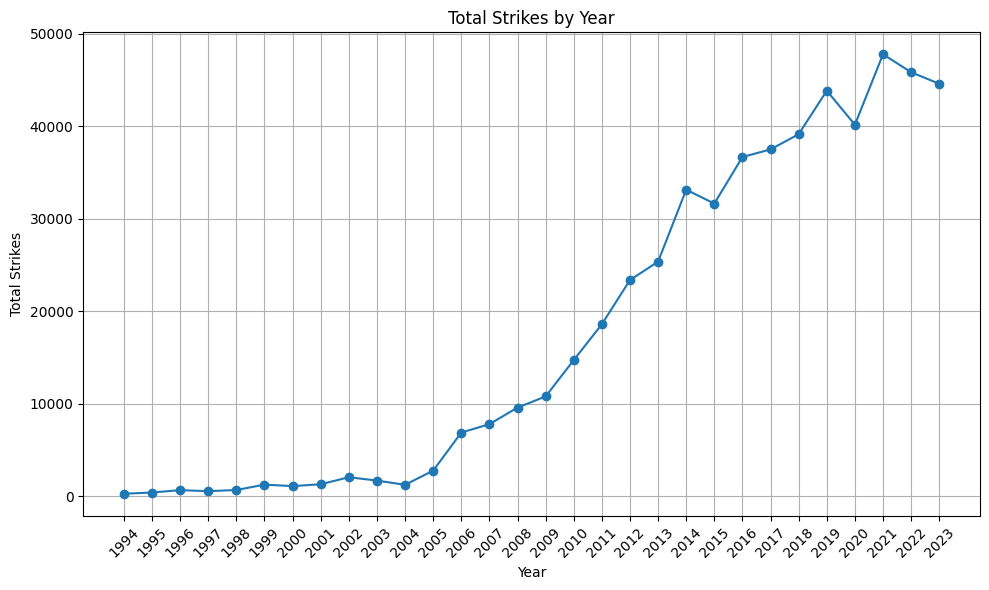

In [105]:
# Group the DataFrame by 'Year' and sum the strikes for each year
strikes_by_year = modi_data.groupby('Year')[['Fighter_1_STR', 'Fighter_2_STR']].sum()

# Sum both Fighter 1's strikes and Fighter 2's strikes for each year
total_strikes_by_year = strikes_by_year.sum(axis=1)

# Plot the total strikes by year
plt.figure(figsize=(10, 6))
plt.plot(total_strikes_by_year, marker='o', linestyle='-')
plt.title('Total Strikes by Year')
plt.xlabel('Year')
plt.ylabel('Total Strikes')
plt.grid(True)
plt.xticks(total_strikes_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

## Q58. What is the total number of takedowns each year ?

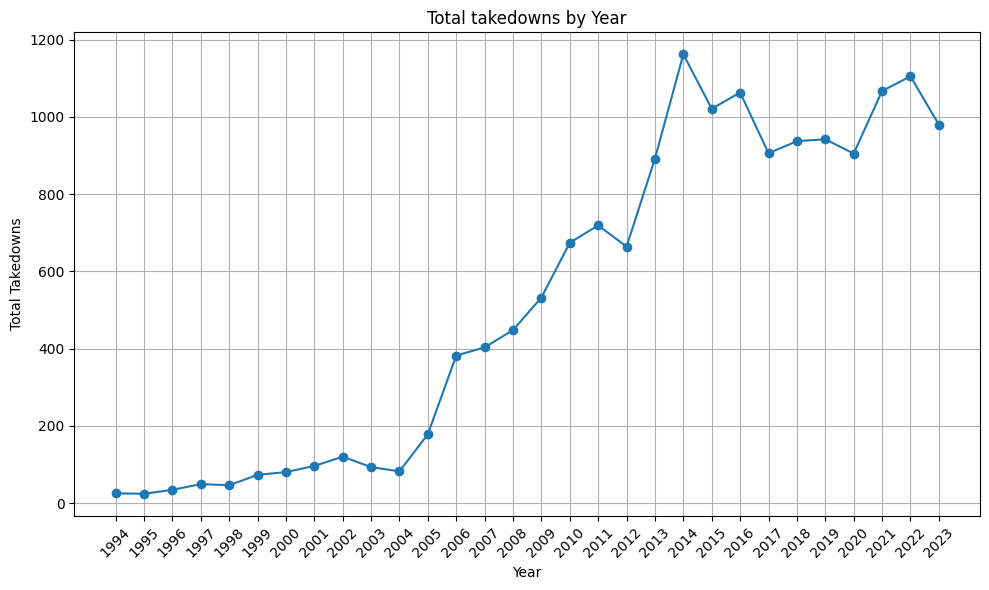

In [106]:
# Group the DataFrame by 'Year' and sum the strikes for each year
takedowns_by_year = modi_data.groupby('Year')[['Fighter_1_TD', 'Fighter_2_TD']].sum()

# Sum both Fighter 1's takedowns and Fighter 2's takedowns for each year
total_takedowns_by_year = takedowns_by_year.sum(axis=1)

# Plot the total takedowns by year
plt.figure(figsize=(10, 6))
plt.plot(total_takedowns_by_year, marker='o', linestyle='-')
plt.title('Total takedowns by Year')
plt.xlabel('Year')
plt.ylabel('Total Takedowns')
plt.grid(True)
plt.xticks(total_strikes_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

## Q59. What is the total number of submission attempts each year ?

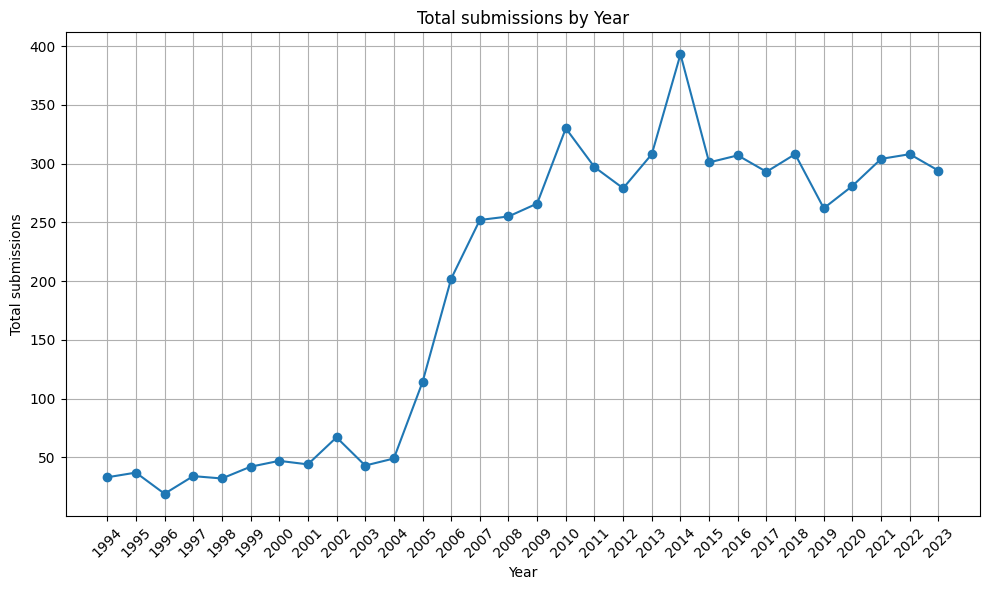

In [107]:
# Group the DataFrame by 'Year' and sum the strikes for each year
subs_by_year = modi_data.groupby('Year')[['Fighter_1_SUB', 'Fighter_2_SUB']].sum()

# Sum both Fighter 1's takedowns and Fighter 2's takedowns for each year
total_subs_by_year = subs_by_year.sum(axis=1)

# Plot the total takedowns by year
plt.figure(figsize=(10, 6))
plt.plot(total_subs_by_year, marker='o', linestyle='-')
plt.title('Total submissions by Year')
plt.xlabel('Year')
plt.ylabel('Total submissions')
plt.grid(True)
plt.xticks(total_strikes_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

## Q60. What is the number of fights in each weight class ?

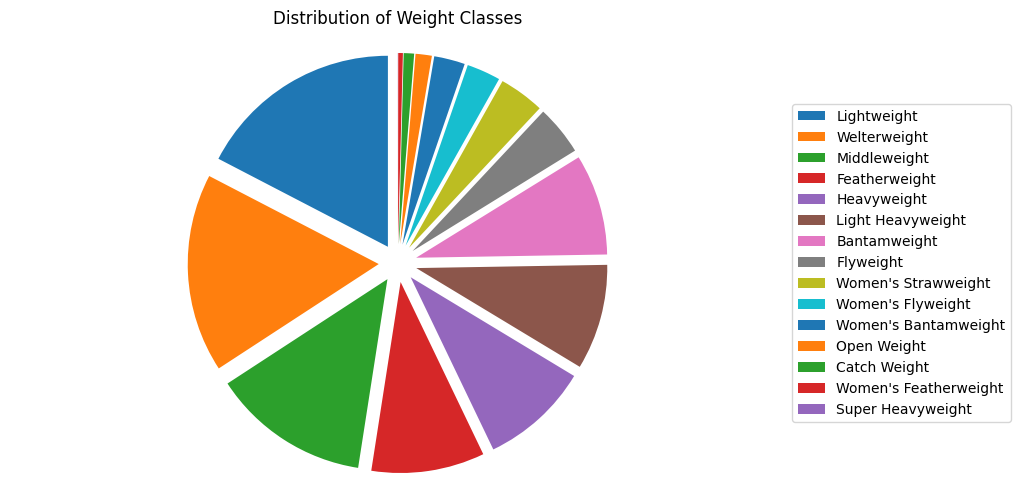

In [108]:
# Count the number of values for each unique value of 'Weight_Class'
weight_class_counts = modi_data['Weight_Class'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 6))
explode = [0.1] * len(weight_class_counts)  # Explode all slices slightly
patches, _ = plt.pie(weight_class_counts, startangle=90, explode=explode)
plt.title('Distribution of Weight Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create legend from pie chart patches and use weight class names as labels
plt.legend(patches, weight_class_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

## Q61. Weight classes distributed over Fight Night events

In [109]:
# Filter the DataFrame for rows where 'Event Name' contains 'Fight Night'
fight_night_events = modi_data[modi_data['Event Name'].str.contains('Fight Night')]

# Get the value counts for the 'Weight_Class' column within the filtered DataFrame
weight_class_counts = fight_night_events['Weight_Class'].value_counts()

print("Event Names containing 'Fight Night':")
print(fight_night_events['Event Name'].unique())
print("\nWeight Class Counts:")
print(weight_class_counts)

Event Names containing 'Fight Night':
['UFC Fight Night' 'UFC Fight Night 56'
 'UFC Fight Night - Fight for the Troops '
 'UFC Fight Night - Fight for the Troops' 'UFC Fight Night 6 '
 'UFC Fight Night 6' 'UFC Fight Night 5 ' 'UFC Fight Night 5'
 'UFC Fight Night 4' 'UFC Fight Night 3' 'UFC Fight Night 2 '
 'UFC Fight Night 2' 'UFC Fight Night 1' 'UFC Fight Night 1 ']

Weight Class Counts:
Lightweight              570
Welterweight             548
Middleweight             418
Featherweight            394
Bantamweight             342
Heavyweight              257
Light Heavyweight        251
Flyweight                178
Women's Strawweight      172
Women's Flyweight        142
Women's Bantamweight     112
Catch Weight              35
Women's Featherweight     12
Name: Weight_Class, dtype: int64


## Q62. Methods distributed over Fight Night events

In [110]:
# Get the value counts for the 'Weight_Class' column within the filtered DataFrame
method_counts = fight_night_events['Method'].value_counts()

print("Event Names containing 'Fight Night':")
print(fight_night_events['Event Name'].unique())
print("\nMethod Counts:")
print(method_counts)

Event Names containing 'Fight Night':
['UFC Fight Night' 'UFC Fight Night 56'
 'UFC Fight Night - Fight for the Troops '
 'UFC Fight Night - Fight for the Troops' 'UFC Fight Night 6 '
 'UFC Fight Night 6' 'UFC Fight Night 5 ' 'UFC Fight Night 5'
 'UFC Fight Night 4' 'UFC Fight Night 3' 'UFC Fight Night 2 '
 'UFC Fight Night 2' 'UFC Fight Night 1' 'UFC Fight Night 1 ']

Method Counts:
U-DEC                          1292
KO/TKO Punches                  384
KO/TKO Punch                    380
S-DEC                           335
SUB Rear Naked Choke            285
SUB Guillotine Choke            118
KO/TKO Kick                      88
SUB Armbar                       61
KO/TKO Elbows                    52
KO/TKO Knee                      51
KO/TKO                           51
SUB Arm Triangle                 48
M-DEC                            40
SUB Triangle Choke               37
KO/TKO Elbow                     18
SUB D'Arce Choke                 16
SUB Anaconda Choke               16
S

## Q63. Weight classes divided over non Fight Night events

In [111]:
# Filter the DataFrame for rows where 'Event Name' does not contain 'Fight Night'
non_fight_night_events = modi_data[~modi_data['Event Name'].str.contains('Fight Night')]

# Get the value counts for the 'Weight_Class' column within the filtered DataFrame
weight_class_counts = non_fight_night_events['Weight_Class'].value_counts()

print("Event Names not containing 'Fight Night':")
print(non_fight_night_events['Event Name'].unique())
print("\nWeight Class Counts:")
print(weight_class_counts)

Event Names not containing 'Fight Night':
['UFC 295' 'UFC 294' 'UFC 293' 'UFC 292' 'UFC 291' 'UFC 290' 'UFC 289'
 'UFC 288' 'UFC 287' 'UFC 286' 'UFC 285' 'UFC 284' 'UFC 283' 'UFC 282'
 'UFC 281' 'UFC 280' 'UFC 279' 'UFC 278' 'UFC 277' 'UFC 276' 'UFC 275'
 'UFC 274' 'UFC 273' 'UFC 272' 'UFC 271' 'UFC 270' 'UFC 269' 'UFC 268'
 'UFC 267' 'UFC 266' 'UFC 265' 'UFC 264' 'UFC 263' 'UFC 262' 'UFC 261'
 'UFC 260' 'UFC 259' 'UFC 258' 'UFC 257' 'UFC 256' 'UFC 255' 'UFC 254'
 'UFC 253' 'UFC 252' 'UFC 251' 'UFC 250' 'UFC 249' 'UFC 248' 'UFC 247'
 'UFC 246' 'UFC 245' 'UFC 244' 'UFC 243' 'UFC 242' 'UFC 241' 'UFC 240'
 'UFC 239' 'UFC 238' 'UFC 237' 'UFC 236' 'UFC 235' 'UFC 234' 'UFC 232'
 'UFC 231' 'The Ultimate Fighter' 'UFC 230' 'UFC 229' 'UFC 228' 'UFC 227'
 'UFC 226' 'UFC 225' 'UFC 224' 'UFC 223' 'UFC 222' 'UFC 221' 'UFC 220'
 'UFC 219' 'UFC 218' 'UFC 217' 'UFC 216' 'UFC 215' 'UFC 214' 'UFC 213'
 'UFC 212' 'UFC 211' 'UFC on FOX' 'UFC 210' 'UFC 209' 'UFC 208' 'UFC 207'
 'UFC 206' 'UFC 205' 'UFC 204

## Q64. Methods distributed over non Fight Night events

In [112]:
# Filter the DataFrame for rows where 'Event Name' does not contain 'Fight Night'
non_fight_night_events = modi_data[~modi_data['Event Name'].str.contains('Fight Night')]

# Get the value counts for the 'Weight_Class' column within the filtered DataFrame
method1_counts = non_fight_night_events['Method'].value_counts()

print("Event Names not containing 'Fight Night':")
print(non_fight_night_events['Event Name'].unique())
print("\nWeight Class Counts:")
print(method1_counts)

Event Names not containing 'Fight Night':
['UFC 295' 'UFC 294' 'UFC 293' 'UFC 292' 'UFC 291' 'UFC 290' 'UFC 289'
 'UFC 288' 'UFC 287' 'UFC 286' 'UFC 285' 'UFC 284' 'UFC 283' 'UFC 282'
 'UFC 281' 'UFC 280' 'UFC 279' 'UFC 278' 'UFC 277' 'UFC 276' 'UFC 275'
 'UFC 274' 'UFC 273' 'UFC 272' 'UFC 271' 'UFC 270' 'UFC 269' 'UFC 268'
 'UFC 267' 'UFC 266' 'UFC 265' 'UFC 264' 'UFC 263' 'UFC 262' 'UFC 261'
 'UFC 260' 'UFC 259' 'UFC 258' 'UFC 257' 'UFC 256' 'UFC 255' 'UFC 254'
 'UFC 253' 'UFC 252' 'UFC 251' 'UFC 250' 'UFC 249' 'UFC 248' 'UFC 247'
 'UFC 246' 'UFC 245' 'UFC 244' 'UFC 243' 'UFC 242' 'UFC 241' 'UFC 240'
 'UFC 239' 'UFC 238' 'UFC 237' 'UFC 236' 'UFC 235' 'UFC 234' 'UFC 232'
 'UFC 231' 'The Ultimate Fighter' 'UFC 230' 'UFC 229' 'UFC 228' 'UFC 227'
 'UFC 226' 'UFC 225' 'UFC 224' 'UFC 223' 'UFC 222' 'UFC 221' 'UFC 220'
 'UFC 219' 'UFC 218' 'UFC 217' 'UFC 216' 'UFC 215' 'UFC 214' 'UFC 213'
 'UFC 212' 'UFC 211' 'UFC on FOX' 'UFC 210' 'UFC 209' 'UFC 208' 'UFC 207'
 'UFC 206' 'UFC 205' 'UFC 204

## Q65. Calculation of Probabilities for Weight Classes and Fight Methods

In [113]:
# Total number of fights
total_fights = len(modi_data)

# Probabilities of Weight Class
weight_class_probabilities = modi_data['Weight_Class'].value_counts() / total_fights

# Probabilities of Method categories
method_probabilities = {}

# Probabilities for 'Method' containing 'DEC'
method_probabilities['DEC'] = modi_data['Method'].str.contains('DEC').sum() / total_fights

# Probabilities for 'Method' beginning with 'KO/TKO'
method_probabilities['KO/TKO'] = modi_data['Method'].str.startswith('KO/TKO').sum() / total_fights

# Probabilities for 'Method' beginning with 'SUB'
method_probabilities['SUB'] = modi_data['Method'].str.startswith('SUB').sum() / total_fights

print("Probabilities of Weight Class:")
print(weight_class_probabilities)
print("\nProbabilities of Method categories:")
print(method_probabilities)

Probabilities of Weight Class:
Lightweight              0.173772
Welterweight             0.168241
Middleweight             0.133432
Featherweight            0.095791
Heavyweight              0.092283
Light Heavyweight        0.089180
Bantamweight             0.085402
Flyweight                0.042094
Women's Strawweight      0.038451
Women's Flyweight        0.028602
Women's Bantamweight     0.026174
Open Weight              0.013761
Catch Weight             0.008770
Women's Featherweight    0.003913
Super Heavyweight        0.000135
Name: Weight_Class, dtype: float64

Probabilities of Method categories:
{'DEC': 0.45925526173772263, 'KO/TKO': 0.328656233135456, 'SUB': 0.19805720453318942}


## Q66. Which fighter in the Women's division has the first first round knockout ?

In [114]:
# Filter the DataFrame based on the conditions
filtered_data = modi_data[
    (modi_data['Weight_Class'].str.startswith('Women')) & 
    (modi_data['Round'] == 1) & 
    (modi_data['Method'].str.startswith('KO/TKO'))
]

# Find the row with the earliest date among the filtered rows
earliest_date_row = filtered_data.loc[filtered_data['Date'].idxmin()]

# Get the winner from the earliest date row
winner = earliest_date_row['Winner']

print("Winner for the earliest date among the filtered rows:", winner)

Winner for the earliest date among the filtered rows: Sara McMann


## Q67. Which fighter in the Women's division has the first knockout ?

In [115]:
# Filter the DataFrame based on the conditions
filtered_data = modi_data[
    (modi_data['Weight_Class'].str.startswith('Women')) & 
    (modi_data['Method'].str.startswith('KO/TKO'))
]

# Find the row with the earliest date among the filtered rows
earliest_date_row = filtered_data.loc[filtered_data['Date'].idxmin()]

# Get the winner from the earliest date row
winner = earliest_date_row['Winner']

print("Winner for the earliest date among the filtered rows:", winner)

Winner for the earliest date among the filtered rows: Cat Zingano


## Q68. Which fighter in the Women's division has the first first round submission?

In [116]:
# Filter the DataFrame based on the conditions
filtered_dataa = modi_data[
    (modi_data['Weight_Class'].str.startswith('Women')) & 
    (modi_data['Method'].str.startswith('SUB'))
]

# Find the row with the earliest date among the filtered rows
earliest_date_row1 = filtered_dataa.loc[filtered_dataa['Date'].idxmin()]

# Get the winner from the earliest date row
winner1 = earliest_date_row1['Winner']

print("Winner for the earliest date among the filtered rows:", winner1)

Winner for the earliest date among the filtered rows: Ronda Rousey
